<a href="https://colab.research.google.com/github/kenanmorani/Speech_Signal_Processing_idu/blob/main/Windowing_FastFourierTransform_Spectrogram_of_Speech_Signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* The following code checks wave sound files 
titled 'speech_sound' . The sound wave files live on my github 
https://github.com/kenanmorani/Speech_Signal_Processing_idu/blob/main/data/speech_sound.wav  
* The code works on windowing, applying fast fourier transformation and plotting the spectrogram in different scales.

In [1]:
# Installing and Importing the necessary libraries
!pip install matplotlib
!pip install librosa
%matplotlib inline  
import librosa                    
import IPython                
import numpy as np                                    
import os                          

import librosa.display             
import matplotlib.pyplot as plt    
import seaborn as sns              
from IPython.display import Audio

In [2]:
# Cloning the data from github
!git clone https://github.com/kenanmorani/Speech_Signal_Processing_idu/

fatal: destination path 'Speech_Signal_Processing_idu' already exists and is not an empty directory.


In [3]:
# Load files using librosa
speech_sound, sr = librosa.load('/content/Speech_Signal_Processing_idu/data/speech_sound.wav')
fs=sr # Use sr and fs interchangably

In [4]:
# Listening to the speech sound
import IPython.display as ipd
ipd.Audio('/content/Speech_Signal_Processing_idu/data/speech_sound.wav')

In [5]:
# Looking at the numebr of samples in the sound waves
print("speech_sound samples are",speech_sound.size)

speech_sound samples are 88109


In [6]:
# Looking at sample duration
sample_duration = 1/sr
print('sample duration is', sample_duration, 'seconds')

sample duration is 4.5351473922902495e-05 seconds


In [7]:
# Looking into the duration of the signals
speech_sound_duration = sample_duration * len(speech_sound)
print('duration of speech sound signal is', speech_sound_duration, 'seconds')

duration of speech sound signal is 3.995873015873016 seconds


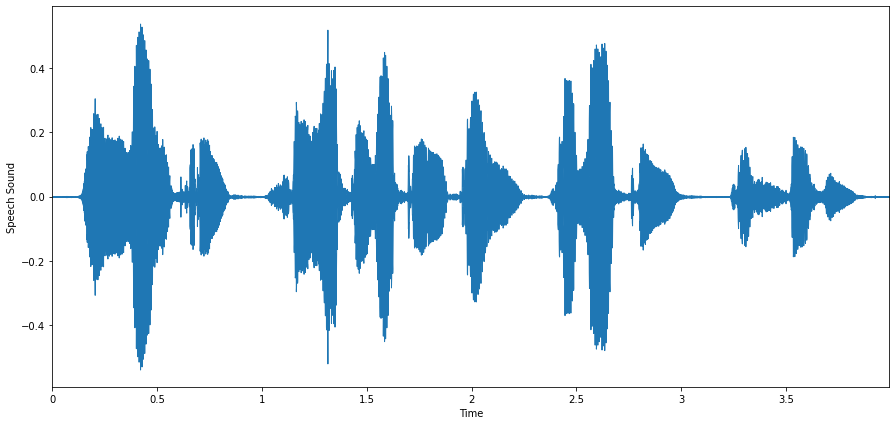

In [9]:
# Displaying the wave sounds using librosa 
plt.figure(figsize=(15, 7))
plt.ylabel('Speech Sound')
plt.xlabel('Time')
librosa.display.waveplot(speech_sound, sr=fs)

# Windowing in time domain and applying fast fourier transform

Text(0.5, 0, 'Time')

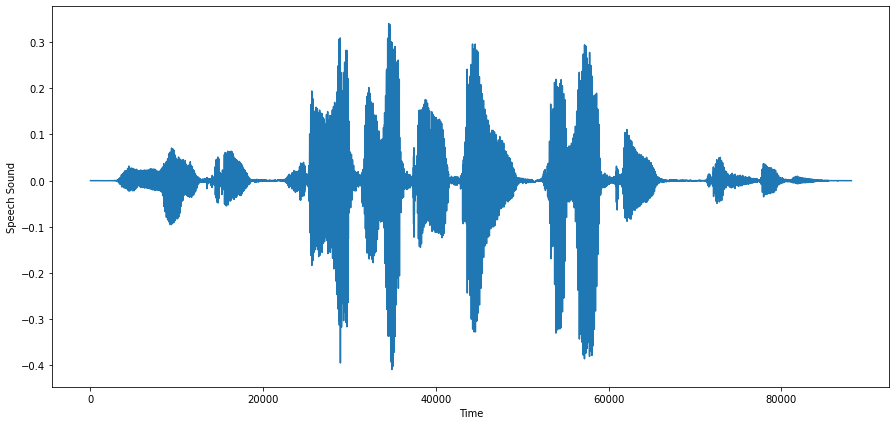

In [16]:
#Reference URL: https://www.programcreek.com/python/example/102138/numpy.hamming

# Using hamming window to conduct windowing in time domain
plt.figure(figsize=(15,7)) 
N = len(speech_sound)
w = np.hamming(N)
w_speech_sound = speech_sound * w 
plt.plot(w_speech_sound)
plt.ylabel('Speech Sound')
plt.xlabel('Time')

In [11]:
# The length of the time domain 
print('time length for Speech Sound =', len(w_speech_sound))

time length for Speech Sound = 88109


In [12]:
# Constants
hop_length = 151

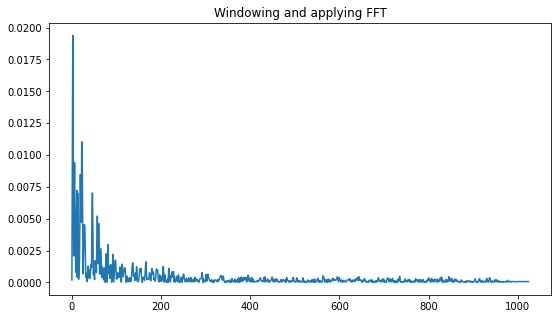

In [22]:
# Fast Fourier Transformation
n_fft = 2048
fft_w_speech_sound = np.abs(librosa.stft(w_speech_sound[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.figure(figsize=(9,5))
plt.title('Windowing and applying FFT')
plt.plot(fft_w_speech_sound);

# Spectrogram

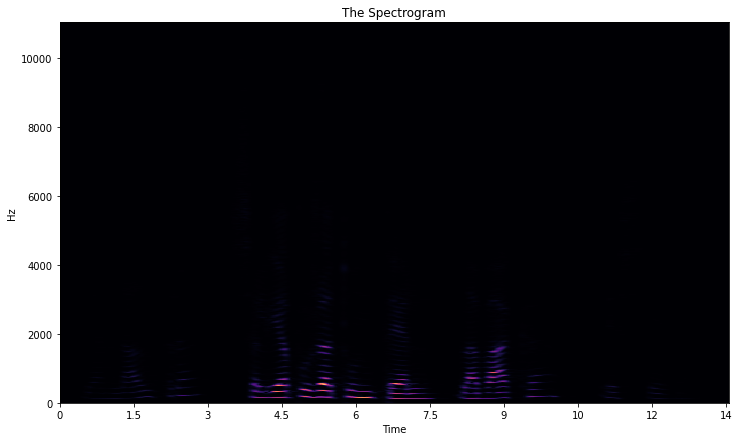

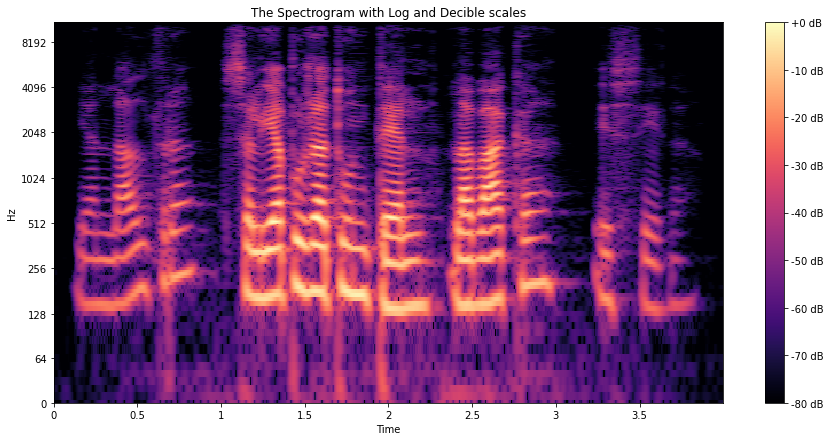

In [28]:
# Spectrograms using librosa
spec_w_speech_sound = np.abs(librosa.stft(w_speech_sound, n_fft=n_fft,  hop_length=hop_length))
plt.figure(figsize=(12,7))
plt.title('The Spectrogram')
librosa.display.specshow(spec_w_speech_sound, sr=fs, x_axis='time', y_axis='linear')

# Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibeles
DB_spectrogram = librosa.amplitude_to_db(spec_w_speech_sound, ref=np.max)
plt.figure(figsize=(15,7))
plt.title('The Spectrogram with Log and Decible scales')
librosa.display.specshow(DB_spectrogram, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')